# **ÌÉÄÏù¥ÌÉÄÎãâ Îç∞Ïù¥ÌÑ∞ Ïã§Ïäµ**

## 1. Îç∞Ïù¥ÌÑ∞ Î°úÎî©

In [115]:
# ÏÇ¨Ïö© Ìå®ÌÇ§ÏßÄ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd # ÌåêÎã§Ïä§
from sklearn.model_selection import train_test_split # ÌõàÎ†®/ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Î∂ÑÎ¶¨
from sklearn.preprocessing import StandardScaler # ÌëúÏ§ÄÌôî
from sklearn.tree import DecisionTreeClassifier # DT
from sklearn.ensemble import RandomForestClassifier # RF
from sklearn.svm import SVC # SVM
from sklearn.linear_model import LogisticRegression # LR
from sklearn.metrics import accuracy_score # Ï†ïÌôïÎèÑ
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # Ï†ïÌôïÎèÑ, ÌòºÎèôÌñâÎ†¨ 
import seaborn as sns # ÏãúÎ≥∏
from sklearn.preprocessing import LabelEncoder # ÏóîÏΩîÎî©
import matplotlib.pyplot as plt # Îß∑ÌîåÎ°ØÎ¶Ω

In [72]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞(url)
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"
titan = pd.read_csv(url)

In [73]:
# Îç∞Ïù¥ÌÑ∞ Î≥ÄÏàò ÌôïÏù∏
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
# Îç∞Ïù¥ÌÑ∞ Î≥ÄÏàòÎ™Ö ÌôïÏù∏
titan.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [75]:
# Îç∞Ïù¥ÌÑ∞ Ï≤´ 5Ìñâ
titan.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## 2. Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [76]:
titan.isnull().sum() # Age : 177Í∞ú, Cabin : 687Í∞ú, Embarked : 2Í∞ú Ï°¥Ïû¨

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Í≤∞Ï∏°Ïπò Ï†úÍ±∞(AgeÏù∏ Í≤ΩÏö∞ ÌèâÍ∑† ÎÇòÏù¥Î°ú ÎåÄÏ≤¥)

In [86]:
titan["Age"] = pd.to_numeric(titan["Age"], errors="coerce")  # Ïà´ÏûêÎ°ú Î≥ÄÌôò, Î≥ÄÌôò Î∂àÍ∞ÄÎä•Ìïú Í∞íÏùÄ NaNÏúºÎ°ú Î≥ÄÍ≤Ω

In [87]:
titan["Age"] = titan["Age"].fillna(titan["Age"].mean()) # Age Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎ•º ÌèâÍ∑†Í∞íÏúºÎ°ú Ï≤¥Ï≤¥

In [118]:
titan["Age"].dtype # Ïã§ÏàòÌòïÏúºÎ°ú Î≥ÄÌôò
titan["Age"].head() 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [90]:
titan.isnull().sum() # Age Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏùå.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 4. Î†àÏù¥Î∏î ÌôïÏù∏(Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞)

In [117]:
titan['Survived'].value_counts() # Î∞òÏùëÎ≥ÄÏàòÏù¥Ïûê Î≤îÏ£ºÌòï Î≥ÄÏàòÏù∏ ÏÉùÏ°¥Ïó¨Î∂ÄÎäî ÏÇ¨ÎßùÏûê(0)Í∞Ä ÏÉùÏ°¥Ïûê(1)Ïóê ÎπÑÌï¥ ÎßéÏùå(ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï).

Survived
0    549
1    342
Name: count, dtype: int64

## 5. Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞

In [94]:
# Î∂ÑÏÑùÏóêÏÑú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎäî Î≥ÄÏàò Ï†úÍ±∞(ÏäπÍ∞ùID, Ïù¥Î¶Ñ, Ìã∞Ïºì Î≤àÌò∏, Í∞ùÏã§ Î≤àÌò∏, Í∏∞Ìï≠ÏßÄ ÏúÑÏπò)
titanic = titan.drop(['PassengerId','Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [119]:
# Î≥ÄÏàòÎ™Ö ÌôïÏù∏
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## 6. ÏóîÏΩîÎî©(Ïà´Ïûê)

In [120]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏù∏ Sex(ÏÑ±Î≥Ñ) Î≥ÄÏàòÎ•º Ïõê-Ìï´Ïù∏ÏΩîÎî©
encoder = LabelEncoder() # LabelEncoder Í∞ùÏ≤¥ ÏÉùÏÑ±
titanic["Sex"] = encoder.fit_transform(titanic["Sex"]) # ÏÑ±Î≥Ñ Î≥ÄÏàòÎ•º Ïà´ÏûêÎ°ú Î≥ÄÌôò
print(titanic[["Sex"]].head())
# ÎÇ®Ïûê : 1, Ïó¨Ïûê : 0

   Sex
0    1
1    0
2    0
3    0
4    1


## 7. Î∂ÑÎ•ò(RF, DT, LR, KNN, SVM)

In [97]:
# ÌõàÎ†® ÏÑ∏Ìä∏ & ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Î∂ÑÌï†(8:2)
X = titanic.drop(columns=['Survived'])  # ÌÉÄÍ≤ü Î≥ÄÏàò : 'Survived' (ÏÉùÏ°¥Ïó¨Î∂Ä)
y = titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [98]:
# ÌëúÏ§ÄÌôî(For SVM, LR, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

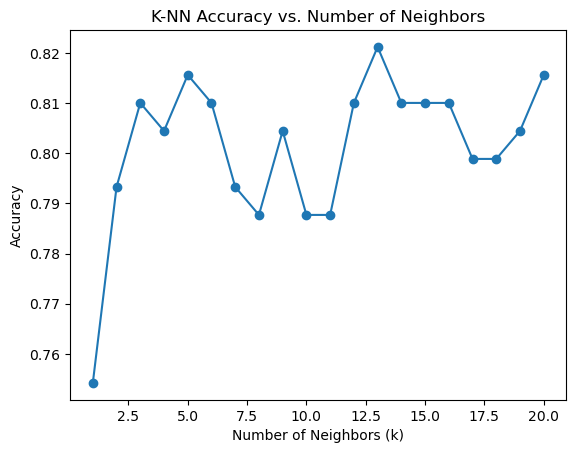

In [110]:
# ÏµúÏ†ÅÏùò kÍ∞í Ï∞æÍ∏∞(KNN)
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.plot(k_values, accuracy_scores, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy vs. Number of Neighbors")
plt.show()

# k=13Ïùº Îïå Í∞ÄÏû• ÎÜíÏùÄ Ï†ïÌôïÎèÑÎ•º Î≥¥ÏûÑ.

In [121]:
# Î™®Îç∏ : ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥(DT), ÎûúÎç§Ìè¨Î†àÏä§Ìä∏(RF), ÏÑúÌè¨Ìä∏Î≤°ÌÑ∞Î®∏Ïã†(SVM), Î°úÏßÄÏä§Ìã±ÏÑ†ÌòïÌöåÍ∑Ä(LR), K-ÏµúÍ∑ºÏ†ëÏù¥ÏõÉ(KNN)
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "KNN" : KNeighborsClassifier(n_neighbors=13)
}

## 8. Ï†ïÌôïÎèÑ Î∞è ÌòºÎèôÌñâÎ†¨

Decision Tree Accuracy: 0.8045
Decision Tree Confusion Matrix:
[[94 16]
 [19 50]]



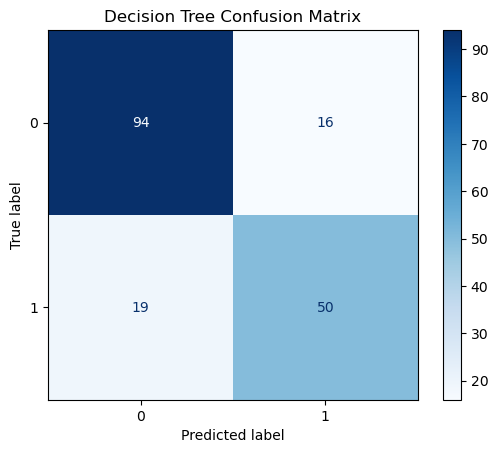

Random Forest Accuracy: 0.8212
Random Forest Confusion Matrix:
[[96 14]
 [18 51]]



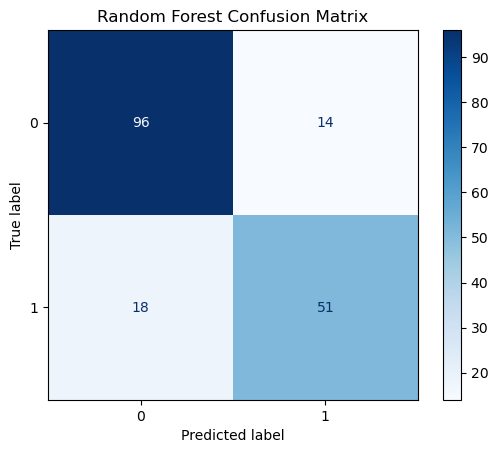

SVM Accuracy: 0.7765
SVM Confusion Matrix:
[[94 16]
 [24 45]]



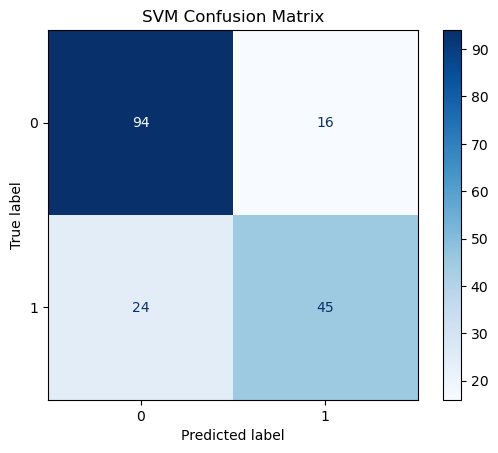

Logistic Regression Accuracy: 0.8101
Logistic Regression Confusion Matrix:
[[97 13]
 [21 48]]



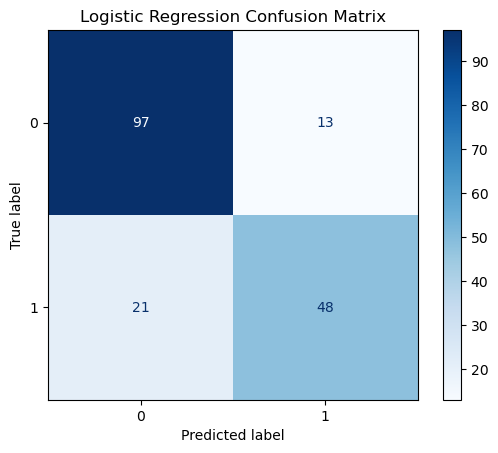

KNN Accuracy: 0.8212
KNN Confusion Matrix:
[[100  10]
 [ 22  47]]



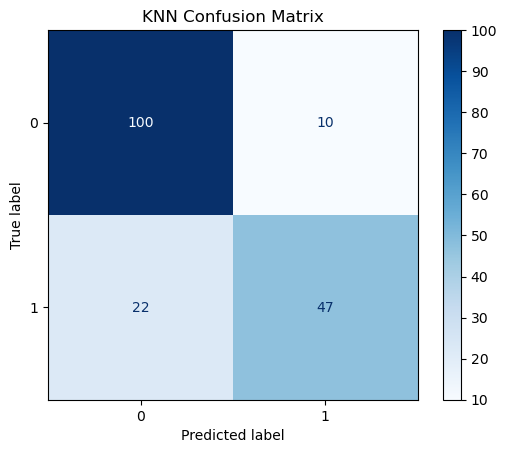

In [122]:
# Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä(Ï†ïÌôïÎèÑ, ÌòºÎèôÌñâÎ†¨)
for name, model in models.items():
    if name in ["SVM", "Logistic Regression", "KNN"]:  
        model.fit(X_train_scaled, y_train)  # üîπ SVM, LR, KNNÏùÄ ÌëúÏ§ÄÌôî Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # üîπ DT, RFÎäî ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïö©
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) # Ï†ïÌôïÎèÑ
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    cm = confusion_matrix(y_test, y_pred) # ÌòºÎèôÌñâÎ†¨
    print(f"{name} Confusion Matrix:\n{cm}\n")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) # ÌòºÎèôÌñâÎ†¨ ÏãúÍ∞ÅÌôî
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()

In [ ]:
# Í≤∞Î°† : 5Í∞úÏùò Î™®Îç∏ Î™®Îëê Ï†ïÌôïÎèÑÍ∞Ä ÏïΩ 77~82% ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Îß§Ïö∞ ÎÜíÏßÄÎäî ÏïäÏùÄ Í≤ÉÏúºÎ°ú Î≥¥ÏïÑ Î∞òÏùëÎ≥ÄÏàòÏùò ÌÅ¥ÎûòÏä§ Î∂àÍ∑†Ìòï ÎïåÎ¨∏ÏúºÎ°ú Î≥¥ÏûÑ.